# Breast Cancer Diagnosis Prediction using ML Models

This project uses the Wisconsin Diagnostic Breast Cancer (WDBC) dataset to predict whether a tumor is malignant (M) or benign (B). Multiple machine learning models are trained, evaluated, and compared using performance metrics like accuracy, precision, recall, F1-score, ROC-AUC, and Precision-Recall curves.

### Data Loading and Preprocessing

- Loaded WDBC dataset

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
with open('wdbc.names', 'r') as f:
    for i, line in enumerate(f.readlines()):
        print(f"{i}: {line.strip()}")

0: 1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)
1: 
2: 2. Source Information
3: 
4: a) Creators:
5: 
6: Dr. William H. Wolberg, General Surgery Dept., University of
7: Wisconsin,  Clinical Sciences Center, Madison, WI 53792
8: wolberg@eagle.surgery.wisc.edu
9: 
10: W. Nick Street, Computer Sciences Dept., University of
11: Wisconsin, 1210 West Dayton St., Madison, WI 53706
12: street@cs.wisc.edu  608-262-6619
13: 
14: Olvi L. Mangasarian, Computer Sciences Dept., University of
15: Wisconsin, 1210 West Dayton St., Madison, WI 53706
16: olvi@cs.wisc.edu
17: 
18: b) Donor: Nick Street
19: 
20: c) Date: November 1995
21: 
22: 3. Past Usage:
23: 
24: first usage:
25: 
26: W.N. Street, W.H. Wolberg and O.L. Mangasarian
27: Nuclear feature extraction for breast tumor diagnosis.
28: IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
29: and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.
30: 
31: OR literature:
32: 
33: O.L. Mangasarian, W.N. Street and W.

In [3]:
columns = [
    'ID', 'Diagnosis',
    'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 'Smoothness_mean',
    'Compactness_mean', 'Concavity_mean', 'Concave_points_mean', 'Symmetry_mean', 'Fractal_dimension_mean',
    'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se', 'Smoothness_se',
    'Compactness_se', 'Concavity_se', 'Concave_points_se', 'Symmetry_se', 'Fractal_dimension_se',
    'Radius_worst', 'Texture_worst', 'Perimeter_worst', 'Area_worst', 'Smoothness_worst',
    'Compactness_worst', 'Concavity_worst', 'Concave_points_worst', 'Symmetry_worst', 'Fractal_dimension_worst'
]

df = pd.read_csv('wdbc.data', header=None, names=columns)

In [4]:
print(df.shape)
df.head()

(569, 32)


,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.isnull().sum()

ID                         0
Diagnosis                  0
Radius_mean                0
Texture_mean               0
Perimeter_mean             0
Area_mean                  0
Smoothness_mean            0
Compactness_mean           0
Concavity_mean             0
Concave_points_mean        0
Symmetry_mean              0
Fractal_dimension_mean     0
Radius_se                  0
Texture_se                 0
Perimeter_se               0
Area_se                    0
Smoothness_se              0
Compactness_se             0
Concavity_se               0
Concave_points_se          0
Symmetry_se                0
Fractal_dimension_se       0
Radius_worst               0
Texture_worst              0
Perimeter_worst            0
Area_worst                 0
Smoothness_worst           0
Compactness_worst          0
Concavity_worst            0
Concave_points_worst       0
Symmetry_worst             0
Fractal_dimension_worst    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   Perimeter_mean           569 non-null    float64
 5   Area_mean                569 non-null    float64
 6   Smoothness_mean          569 non-null    float64
 7   Compactness_mean         569 non-null    float64
 8   Concavity_mean           569 non-null    float64
 9   Concave_points_mean      569 non-null    float64
 10  Symmetry_mean            569 non-null    float64
 11  Fractal_dimension_mean   569 non-null    float64
 12  Radius_se                569 non-null    float64
 13  Texture_se               569 non-null    float64
 14  Perimeter_se             5

In [7]:
df.describe()

,ID,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Data Visualizations

This section explores the dataset visually to understand class distribution, feature relationships, and patterns that may help in classification. Visuals include class counts, correlation heatmap, boxplots, KDE plots, PCA scatter plot, and feature importance charts from Random Forest and XGBoost.

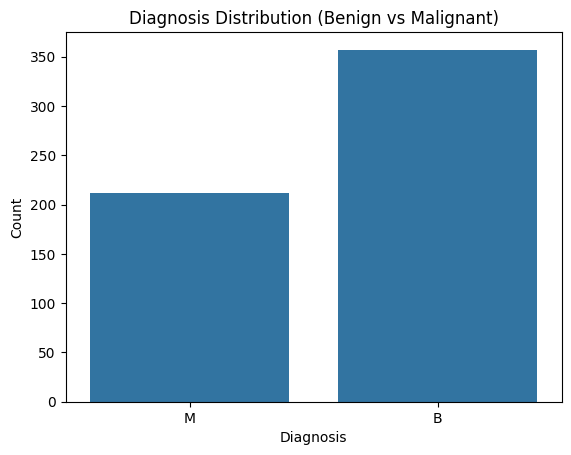

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Diagnosis', data=df)
plt.title('Diagnosis Distribution (Benign vs Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

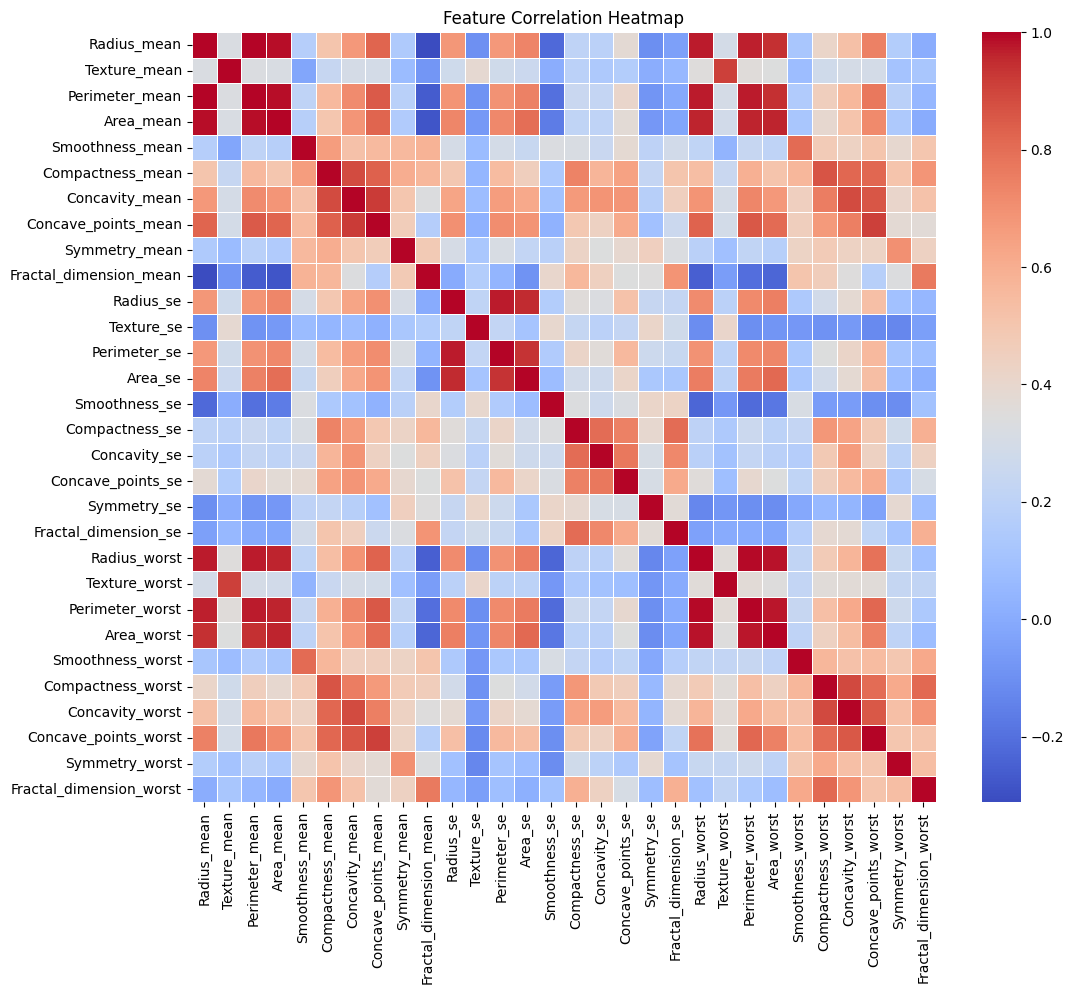

In [9]:
corr = df.iloc[:, 2:].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

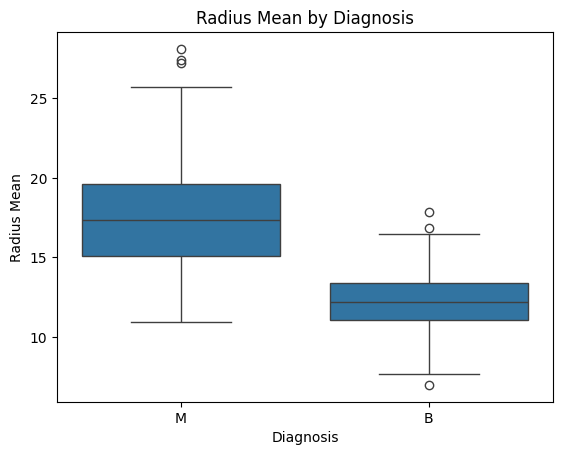

In [10]:
sns.boxplot(x='Diagnosis', y='Radius_mean', data=df)
plt.title('Radius Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.show()

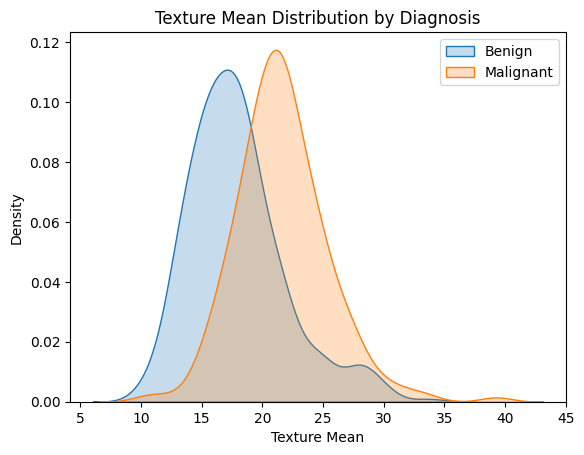

In [11]:
sns.kdeplot(data=df[df['Diagnosis'] == 'B']['Texture_mean'], label='Benign', fill=True)
sns.kdeplot(data=df[df['Diagnosis'] == 'M']['Texture_mean'], label='Malignant', fill=True)
plt.title('Texture Mean Distribution by Diagnosis')
plt.xlabel('Texture Mean')
plt.legend()
plt.show()

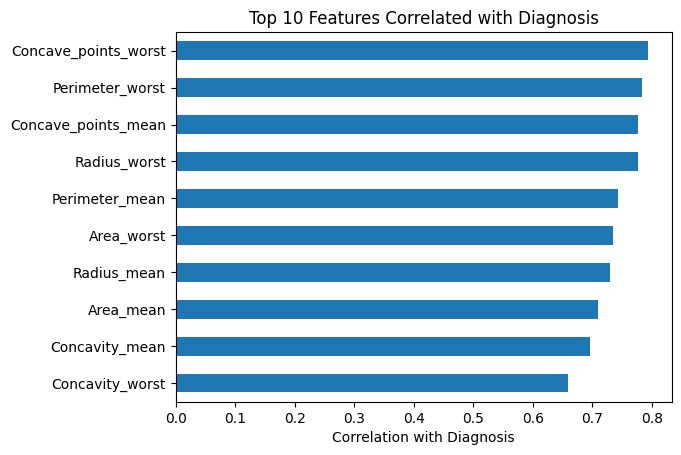

In [12]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
df_encoded['Diagnosis'] = LabelEncoder().fit_transform(df['Diagnosis'])  # M=1, B=0
correlations = df_encoded.corr()['Diagnosis'].drop(['Diagnosis', 'ID']).abs().sort_values(ascending=False)

top10 = correlations.head(10)

top10.plot(kind='barh')
plt.title('Top 10 Features Correlated with Diagnosis')
plt.xlabel('Correlation with Diagnosis')
plt.gca().invert_yaxis()
plt.show()

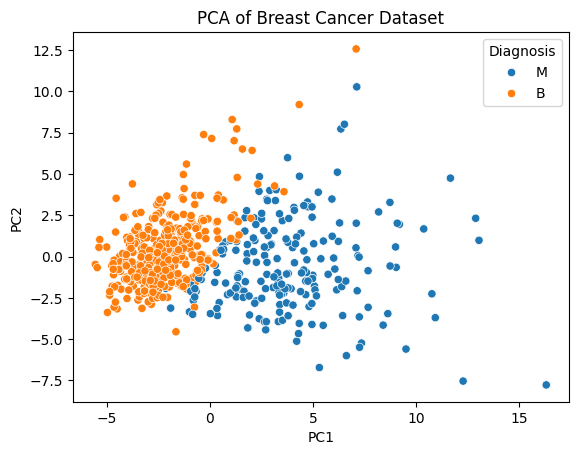

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df.iloc[:, 2:]  # drop ID and Diagnosis
scaled = StandardScaler().fit_transform(features)
pca = PCA(n_components=2)
components = pca.fit_transform(scaled)

df_pca = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
df_pca['Diagnosis'] = df['Diagnosis']

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Diagnosis')
plt.title('PCA of Breast Cancer Dataset')
plt.show()

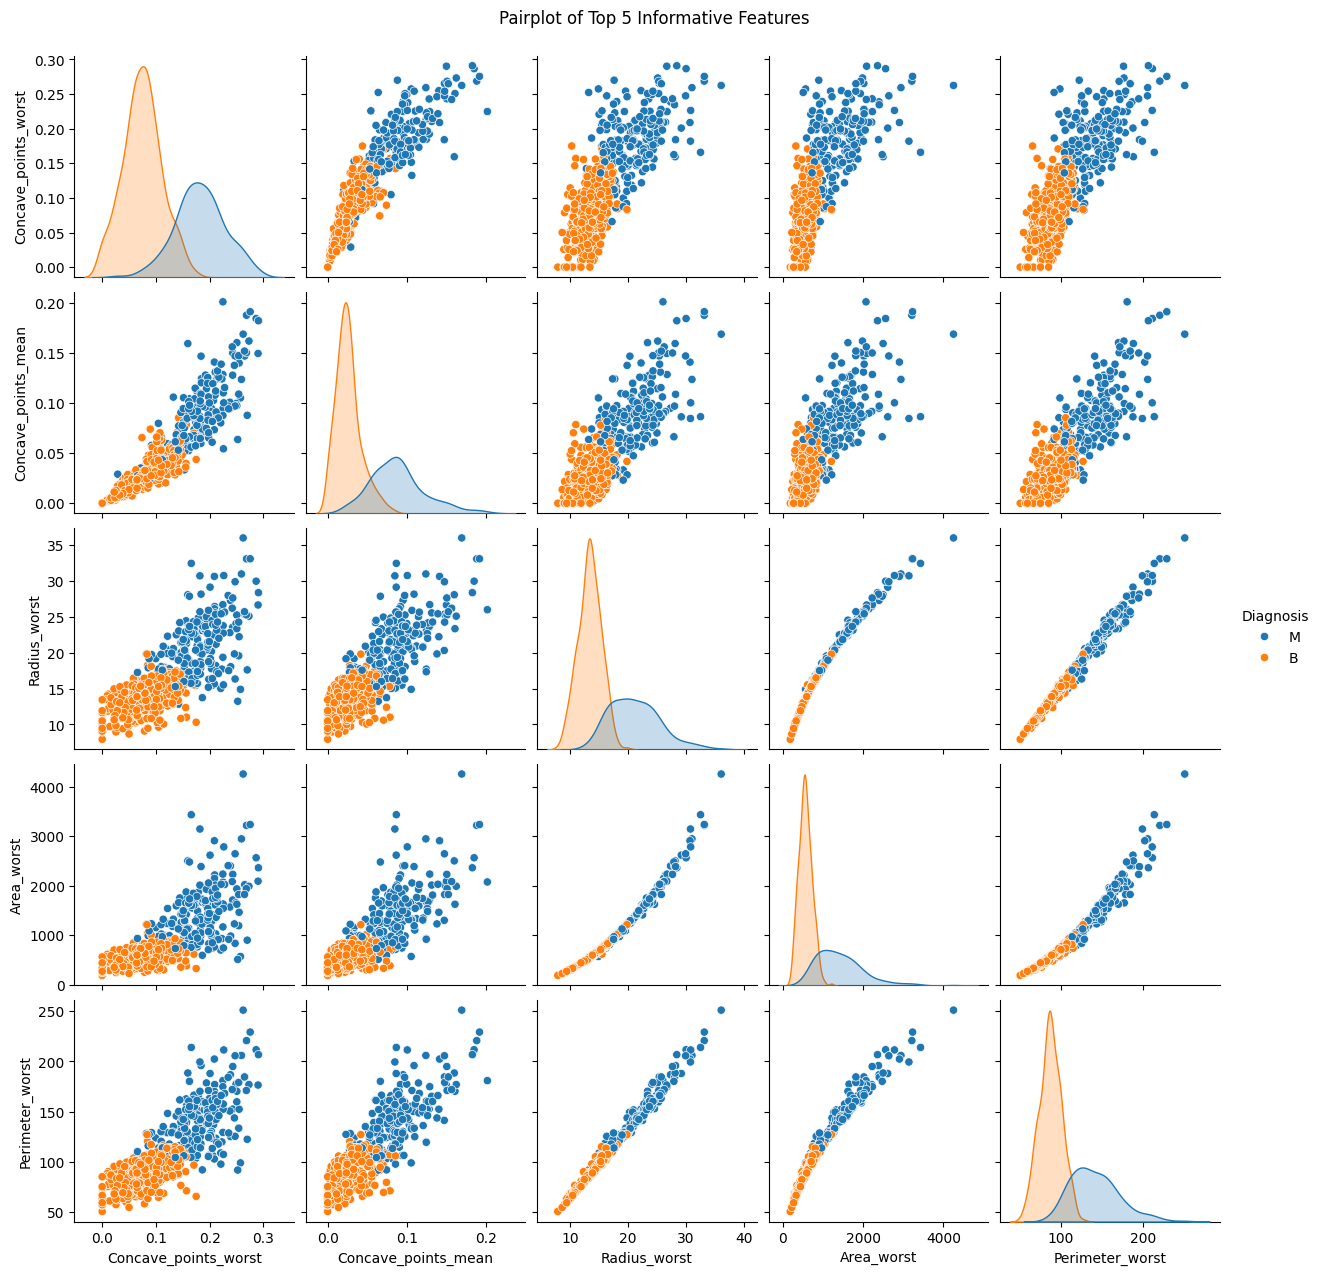

In [14]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

X = df.iloc[:, 2:]
y = df['Diagnosis'].map({'B': 0, 'M': 1})  # encode for info gain
top_features = X.columns[np.argsort(mutual_info_classif(X, y))[-5:]]

sns.pairplot(df[top_features.tolist() + ['Diagnosis']], hue='Diagnosis')
plt.suptitle('Pairplot of Top 5 Informative Features', y=1.02)
plt.show()

#### Assigned feature names and encoded the target variable (`Diagnosis`)

In [15]:
df['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [16]:
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})
df.head()

,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


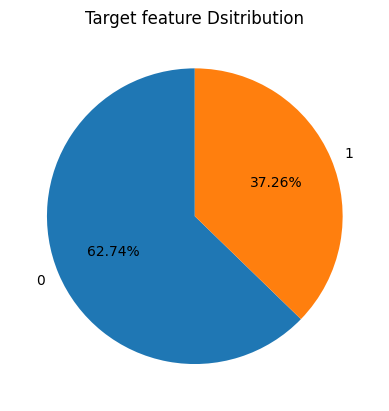

In [17]:
target_count = df['Diagnosis'].value_counts()
plt.pie(target_count, autopct='%1.2f%%', labels=target_count.index, startangle=90)
plt.title("Target feature Dsitribution")
plt.show()

### Model Training and Evaluation

The following models were trained and evaluated:
- Logistic Regression
- Gaussian Naive Bayes (with and without scaling)
- Support Vector Machine (with scaling)
- Decision Tree
- Random Forest
- XGBoost

Each model's performance was evaluated using a classification report and confusion matrix.

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Classification Report for Logistic Regression

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix


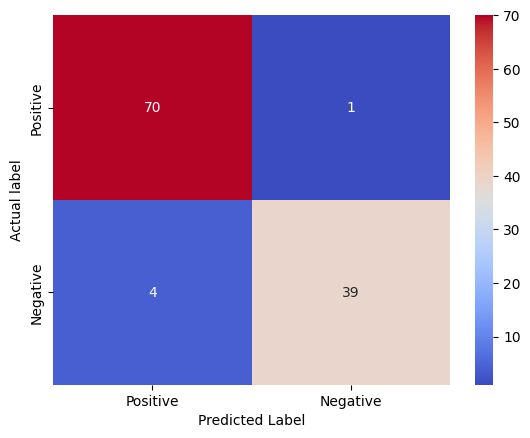

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("Classification Report for Logistic Regression\n")
report = classification_report(y_test, y_pred_lr)
print(report)

print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

Classification Report for Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.62      0.99      0.76        71
           1       0.00      0.00      0.00        43

    accuracy                           0.61       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.39      0.61      0.47       114

Confusion Matrix


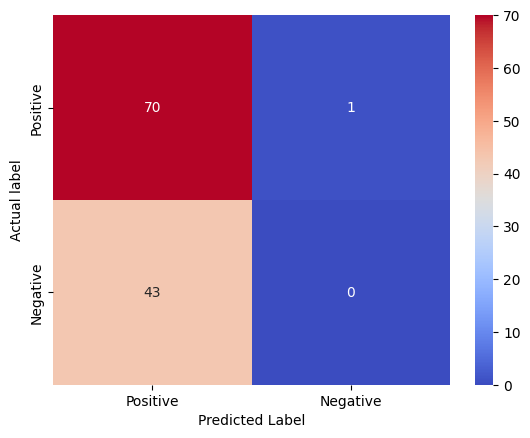

In [20]:
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_gnb = model_gnb.predict(X_test)

print("Classification Report for Gaussian Naive Bayes\n")
report = classification_report(y_test, y_pred_gnb)
print(report)

print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Classification Report for Gaussian Naive Bayes with Scaling

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix


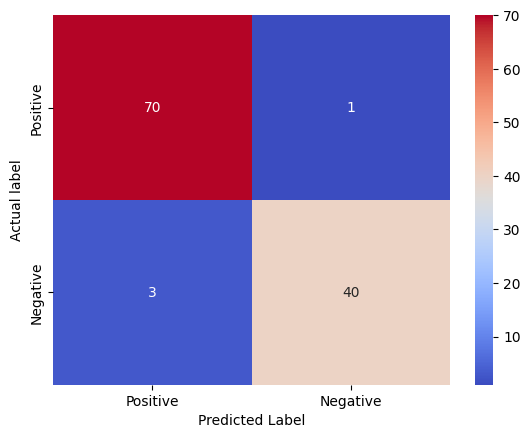

In [22]:
from sklearn.naive_bayes import GaussianNB

model_gnb_scaled = GaussianNB()
model_gnb_scaled.fit(X_train_scaled, y_train)
y_pred_gnb = model_gnb_scaled.predict(X_test_scaled)

print("Classification Report for Gaussian Naive Bayes with Scaling\n")
report = classification_report(y_test, y_pred_gnb)
print(report)

print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

Classification Report for Support Vector Machine with Scaling

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix


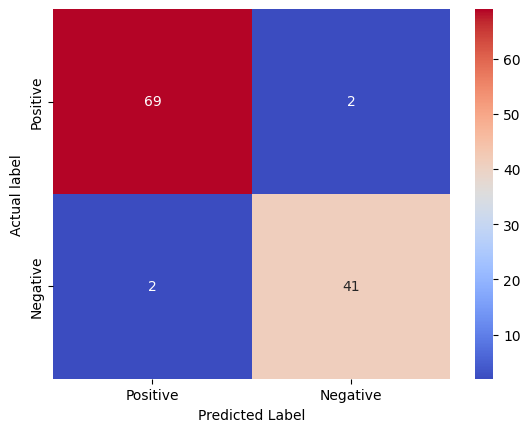

In [23]:
from sklearn.svm import SVC

model_svm = SVC(class_weight='balanced', kernel='rbf', C=1, probability=True)
model_svm.fit(X_train_scaled, y_train)
y_pred_svm = model_svm.predict(X_test_scaled)

print("Classification Report for Support Vector Machine with Scaling\n")
report = classification_report(y_test, y_pred_svm)
print(report)

print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

Classification Report for Decision Tree

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix


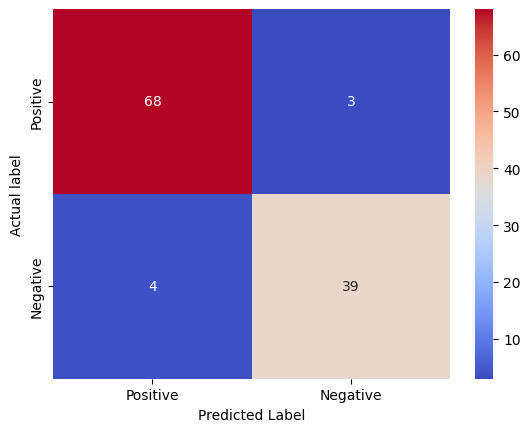

In [24]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print("Classification Report for Decision Tree\n")
report = classification_report(y_test, y_pred_dt)
print(report)

print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

Classification Report for Random Forest

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix


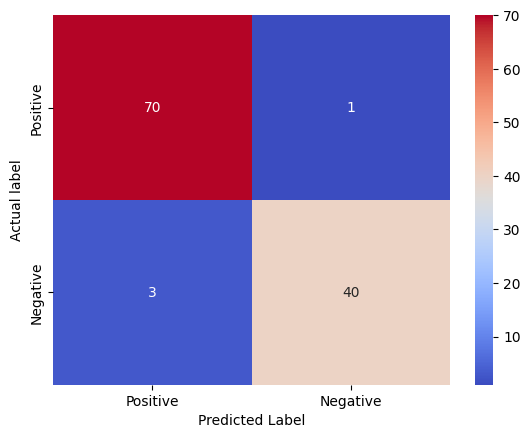

In [25]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Classification Report for Random Forest\n")
report = classification_report(y_test, y_pred_rf)
print(report)

print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

Classification Report for XGBoost

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix


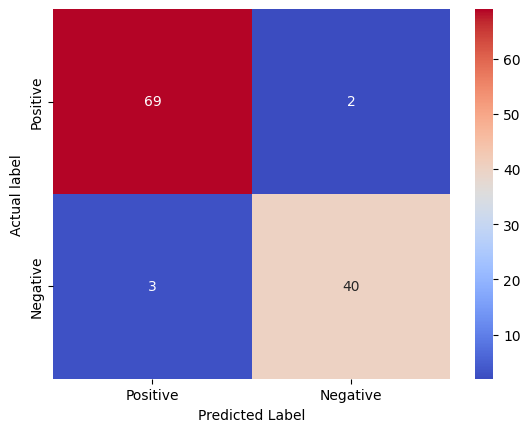

In [26]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

print("Classification Report for XGBoost\n")
report = classification_report(y_test, y_pred_xgb)
print(report)

print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

### ROC-AUC Curve Comparison

The ROC curve compares the true positive rate and false positive rate across thresholds. A higher AUC (Area Under Curve) indicates better separability between classes.

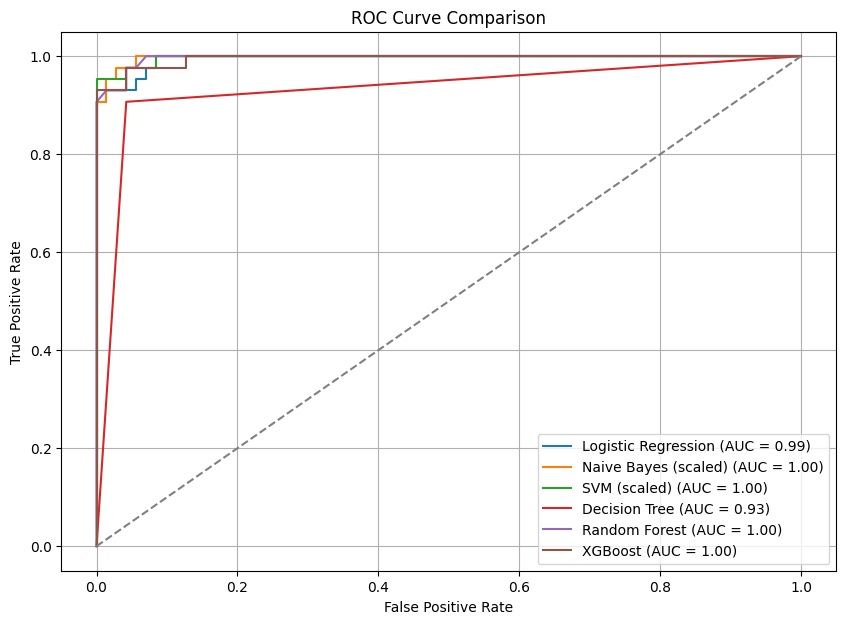

In [27]:
from sklearn.metrics import roc_curve, auc

models = {
    'Logistic Regression': model_lr,
    'Naive Bayes (scaled)': model_gnb_scaled,
    'SVM (scaled)': model_svm,
    'Decision Tree': model_dt,
    'Random Forest': model_rf,
    'XGBoost': model_xgb
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_scaled)[:, 1] if 'scaled' in name else model.predict_proba(X_test)[:, 1]
    else:  # For SVM (no predict_proba)
        y_scores = model.decision_function(X_test_scaled)
    
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Precision-Recall Curve Comparison

Precision-Recall curves are particularly useful when dealing with class imbalance. Here, we compare the average precision of each model across different thresholds.

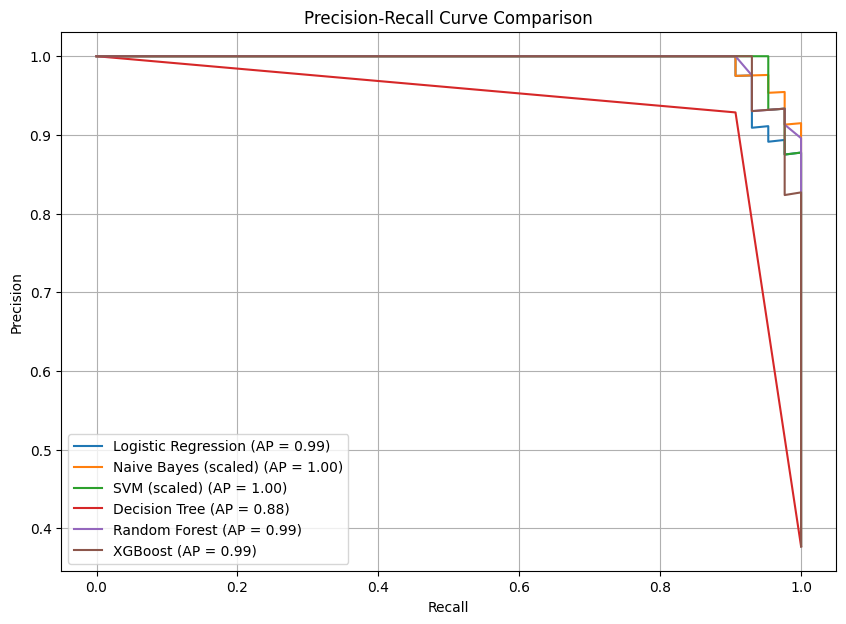

In [28]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 7))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_scaled)[:, 1] if 'scaled' in name else model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test_scaled)
        
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    avg_prec = average_precision_score(y_test, y_scores)
    plt.plot(recall, precision, label=f"{name} (AP = {avg_prec:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend(loc='best')
plt.grid()
plt.show()

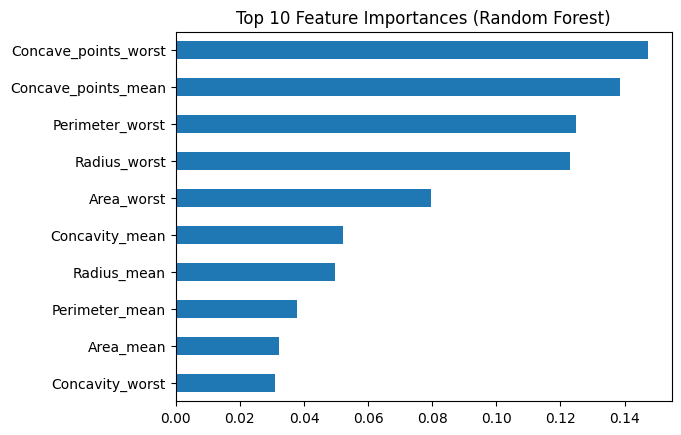

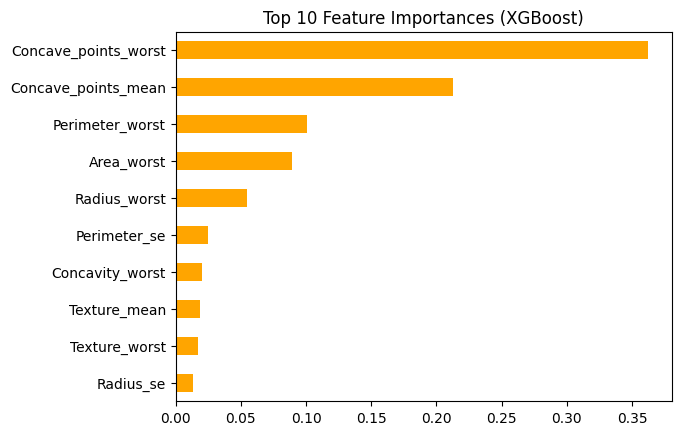

In [29]:
rf_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
rf_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

# XGBoost
xgb_importances = pd.Series(model_xgb.feature_importances_, index=X.columns)
xgb_importances.nlargest(10).plot(kind='barh', color='orange')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.gca().invert_yaxis()
plt.show()

## Final Conclusion

In this project, we applied several machine learning classifiers to predict breast cancer diagnosis based on tumor features.

### Key Findings:
- **Best Models**: Random Forest, XGBoost, and SVM (scaled) all achieved ~100% ROC-AUC and PR-AUC scores.
- **Reliable Baseline**: Logistic Regression was also strong, easy to interpret, and nearly as effective.
- **Underperformers**: Gaussian NB (unscaled) failed without scaling due to assumptions of feature independence and distribution.
- **Important Predictors**: Features such as `Radius_mean`, `Perimeter_worst`, and `Concave_points_mean` consistently ranked highest in importance.

### Recommendation:
For practical deployment, ensemble models (Random Forest or XGBoost) offer robust performance, while Logistic Regression is suitable when interpretability is critical.

This study highlights the power of machine learning in aiding early and accurate diagnosis of breast cancer, potentially improving patient outcomes and clinical workflows.